In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 148M/163M [00:00<00:00, 1.52GB/s]
100% 163M/163M [00:00<00:00, 1.47GB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_709.jpg', 'with_mask_1071.jpg', 'with_mask_1827.jpg', 'with_mask_1197.jpg', 'with_mask_3616.jpg']
['with_mask_488.jpg', 'with_mask_3563.jpg', 'with_mask_1466.jpg', 'with_mask_1990.jpg', 'with_mask_2617.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_2053.jpg', 'without_mask_3682.jpg', 'without_mask_1622.jpg', 'without_mask_3231.jpg', 'without_mask_759.jpg']
['without_mask_2586.jpg', 'without_mask_1312.jpg', 'without_mask_2164.jpg', 'without_mask_3414.jpg', 'without_mask_3212.jpg']


In [ ]:
len(with_mask_files),len(without_mask_files)

(3725, 3828)

# **1 - > Mask**
# **0 - > No Mask**

In [ ]:
with_mask_labels = [1] * 3725

In [ ]:
without_mask_labels = [0] * 3828

In [ ]:
with_mask_labels[:5],without_mask_labels[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [ ]:
len(with_mask_labels),len(without_mask_labels)

(3725, 3828)

In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
len(labels)

7553

In [ ]:
labels[:5],labels[-5:]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

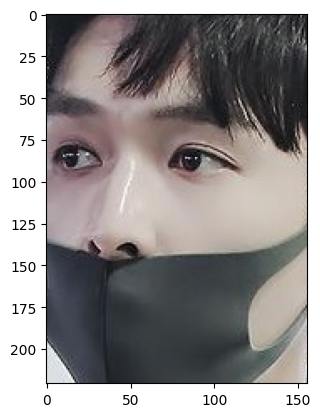

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1021.jpg')
plt.imshow(img)
plt.show()

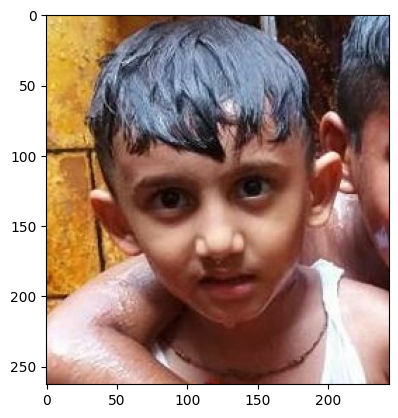

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1022.jpg')
plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  img = Image.open(with_mask_path + img_file)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  img = Image.open(without_mask_path + img_file)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[ 33,  22,  18],
        [ 32,  21,  17],
        [ 28,  17,  13],
        ...,
        [190, 195, 192],
        [191, 197, 196],
        [192, 198, 199]],

       [[ 31,  20,  16],
        [ 31,  20,  16],
        [ 30,  19,  15],
        ...,
        [192, 197, 195],
        [191, 197, 196],
        [191, 197, 197]],

       [[ 35,  24,  20],
        [ 37,  26,  22],
        [ 42,  31,  27],
        ...,
        [196, 200, 199],
        [192, 198, 198],
        [190, 196, 196]],

       ...,

       [[232, 210, 199],
        [233, 210, 199],
        [233, 212, 201],
        ...,
        [192, 190, 175],
        [194, 192, 177],
        [195, 193, 178]],

       [[232, 210, 197],
        [233, 210, 198],
        [235, 212, 201],
        ...,
        [198, 195, 179],
        [199, 196, 181],
        [200, 197, 181]],

       [[231, 209, 195],
        [232, 210, 197],
        [235, 212, 201],
        ...,
        [205, 202, 184],
        [205, 201, 184],
        [204, 201, 184]]], dtype=uint8)
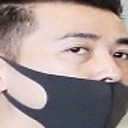

In [ ]:
data[0]

In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
X.shape,y.shape

((7553, 128, 128, 3), (7553,))

In [ ]:
X

array([[[[ 33,  22,  18],
         [ 32,  21,  17],
         [ 28,  17,  13],
         ...,
         [190, 195, 192],
         [191, 197, 196],
         [192, 198, 199]],

        [[ 31,  20,  16],
         [ 31,  20,  16],
         [ 30,  19,  15],
         ...,
         [192, 197, 195],
         [191, 197, 196],
         [191, 197, 197]],

        [[ 35,  24,  20],
         [ 37,  26,  22],
         [ 42,  31,  27],
         ...,
         [196, 200, 199],
         [192, 198, 198],
         [190, 196, 196]],

        ...,

        [[232, 210, 199],
         [233, 210, 199],
         [233, 212, 201],
         ...,
         [192, 190, 175],
         [194, 192, 177],
         [195, 193, 178]],

        [[232, 210, 197],
         [233, 210, 198],
         [235, 212, 201],
         ...,
         [198, 195, 179],
         [199, 196, 181],
         [200, 197, 181]],

        [[231, 209, 195],
         [232, 210, 197],
         [235, 212, 201],
         ...,
         [205, 202, 184],
        

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128, 128, 3)
)

In [ ]:
# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.3),
])

In [ ]:
X_train_aug = data_augmentation(X_train)

In [ ]:
history = model.fit(
    X_train_aug,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.8818 - loss: 0.2698 - val_accuracy: 0.9620 - val_loss: 0.1135
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9629 - loss: 0.0922 - val_accuracy: 0.9603 - val_loss: 0.1031
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9711 - loss: 0.0806 - val_accuracy: 0.9620 - val_loss: 0.1246
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9783 - loss: 0.0577 - val_accuracy: 0.9702 - val_loss: 0.1007
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9836 - loss: 0.0428 - val_accuracy: 0.9669 - val_loss: 0.1067
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9847 - loss: 0.0413 - val_accuracy: 0.9702 - val_loss: 0.1061
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9864 - loss: 0.0349 - val_accuracy: 0.9669 - val_loss: 0.1069
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9922 - loss: 0.0259 - val_ac

In [ ]:
loss , accuarcy = model.evaluate(X_test, y_test)
print('Test Accuracy = ',accuarcy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.9735 - loss: 0.0982
Test Accuracy =  0.9768365025520325


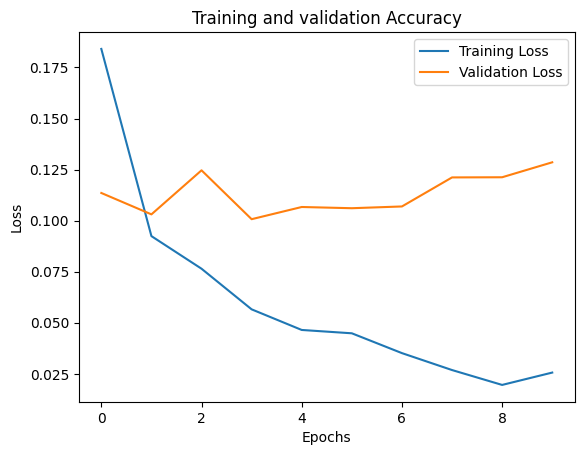

In [ ]:
plt.figsize = (8,5)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

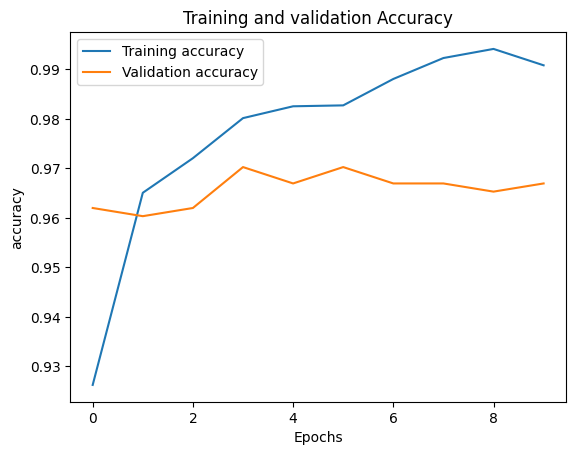

In [ ]:
plt.figsize = (8,5)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred= model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step


In [ ]:
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[736  14]
 [ 21 740]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       750
           1       0.98      0.97      0.98       761

    accuracy                           0.98      1511
   macro avg       0.98      0.98      0.98      1511
weighted avg       0.98      0.98      0.98      1511



In [ ]:
def predict_mask(img_path):
  img = Image.open(img_path)
  img = img.resize((128 , 128))
  img = img.convert('RGB')
  img = np.array(img)
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  prediction = model.predict(img)[0][0]

  if prediction > 0.5:
    return "With Mask 😷"
  else:
    return "Without Mask ❌"

In [ ]:
img = mpimg.imread('/content/gemini-2.5-flash-image_A_highly_realistic_cinematic_portrait_of_a_dashing_man_with_confident_swag_sharp-0 (1).jpg')
plt.imshow(img)
plt.axis('off')
plt.title(predict_mask('/content/gemini-2.5-flash-image_A_highly_realistic_cinematic_portrait_of_a_dashing_man_with_confident_swag_sharp-0 (1).jpg'))
plt.show()

In [ ]:
model.save('mask_detector_model.h5')